In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt


In [2]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM



In [3]:
#Load data
data = pd.read_csv('Tesla.csv') 
print(data.shape) 
print(data.sample(7)) 


(1692, 7)
          Date        Open        High         Low       Close   Volume  \
113  12/8/2010   32.480000   32.490002   31.520000   32.369999   660000   
918  2/21/2014  211.639999  213.979996  209.190002  209.600006  7818800   
416  2/22/2012   34.500000   34.720001   32.500000   34.220001  1654600   
592  11/2/2012   29.270000   29.549999   28.549999   28.920000  1030300   
62   9/27/2010   20.400000   20.809999   20.049999   20.530001   418600   
576  10/9/2012   29.120001   29.120001   28.250000   28.370001  1193000   
614  12/5/2012   33.820000   34.189999   33.580002   33.709999   661500   

      Adj Close  
113   32.369999  
918  209.600006  
416   34.220001  
592   28.920000  
62    20.530001  
576   28.370001  
614   33.709999  


In [4]:
#Prepare Data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

prediction_days = 60

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x,0])
    y_train.append(scaled_data[x,0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))


In [5]:
#Building the Model

model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1)) #Prediction of next closing date

model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs= 25, batch_size=32)



c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - loss: 0.0736
Epoch 2/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0059
Epoch 3/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0047
Epoch 4/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0046
Epoch 5/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0043
Epoch 6/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0046
Epoch 7/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0042
Epoch 8/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0052
Epoch 9/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0036
Epoch 10/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0035
Epoch 11/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0045
Epoch 12/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0038
Epoch 13/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 0.0038
Epoch 14/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0031
Epoch 15/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0035
Epoc

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


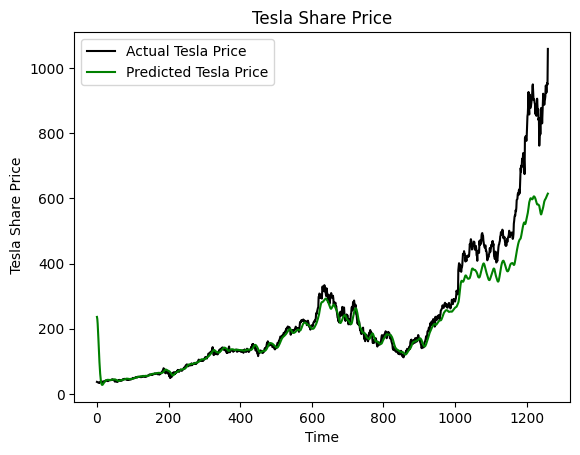

In [10]:
#Testing the Model Accuracy

#Load Test Data
company = "Nvidia"
test_data = pd.read_csv('NVDA.csv') 
actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data[ 'Close']), axis=0)

model_inputs= total_dataset [len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape (-1, 1)
model_inputs = scaler.transform (model_inputs)


#Make Predictions on Test Data

x_test = []

for x in range (prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

#Plot the Test Predictions
plt.plot(actual_prices, color="black", label= f"Actual {company} Price") 
plt.plot(predicted_prices, color='green', label=f"Predicted {company} Price") 
plt.title(f"{company} Share Price")
plt.xlabel ('Time')
plt.ylabel(f' {company} Share Price')
plt. legend()
plt. show()


In [11]:
#Predicting the next day

real_data =[model_inputs[len(model_inputs) + 1-prediction_days: len(model_inputs+1), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1],1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"Prediction: {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Prediction: [[620.9544]]
